In [ ]:
### EDA Pkgs
import pandas as pd
# Data Viz Pkg
import matplotlib.pyplot as plt
import seaborn as sns
# Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data.csv")

In [ ]:
# Preview
df.head()

,_id,text
0,6290f497c4b90b8379bea2c3,@pattonoswalt It's like saying that covid-19 w...
1,6290f497c4b90b8379bea2c4,World 🌐 COVID-19\n\n@corona19_stats \nhttps://...
2,6290f497c4b90b8379bea2c5,RT @HermelaBrook: Ethiopia has attracted 2.05 ...
3,6290f497c4b90b8379bea2c6,RT @umassmemorial: Here's the COVID-19 testing...
4,6290f497c4b90b8379bea2c7,"RT @japantimes: Tokyo confirmed 2,630 new COVI..."


In [ ]:
df.columns

Index(['_id', 'text'], dtype='object')

In [ ]:
df.drop("_id", axis=1, inplace=True)

In [ ]:
df.head()

,text
0,@pattonoswalt It's like saying that covid-19 w...
1,World 🌐 COVID-19\n\n@corona19_stats \nhttps://...
2,RT @HermelaBrook: Ethiopia has attracted 2.05 ...
3,RT @umassmemorial: Here's the COVID-19 testing...
4,"RT @japantimes: Tokyo confirmed 2,630 new COVI..."


In [ ]:
df.text.iloc[4]

'RT @japantimes: Tokyo confirmed 2,630 new COVID-19 cases on Friday, down by 943 from a week earlier. https://t.co/8ol9iQKFRe'

In [ ]:
df.text.iloc[10]

'RT @blckbxnews: Deskundigen reageren met onbegrip op het besluit van @ministerVWS om vitamine D uit het basispakket te halen. ‘Onverantwoor…'

# Data cleaning 
+ remove mentions/userhandles
+ remove_multiple_spaces
+ remove hashtags
+ urls
+ emojis
+ special char
+ remove stop words 


In [ ]:
pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 114 kB 5.2 MB/s 


In [ ]:
# Load Text Cleaning Package
import neattext.functions as nfx

In [ ]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [ ]:
# remove_hashtags 
df['clean_text'] = df.text.apply(nfx.remove_hashtags)

In [ ]:
df.head()

,text,clean_text
0,@pattonoswalt It's like saying that covid-19 w...,@pattonoswalt It's like saying that covid-19 w...
1,World 🌐 COVID-19\n\n@corona19_stats \nhttps://...,World 🌐 COVID-19\n\n@corona19_stats \nhttps://...
2,RT @HermelaBrook: Ethiopia has attracted 2.05 ...,RT @HermelaBrook: Ethiopia has attracted 2.05 ...
3,RT @umassmemorial: Here's the COVID-19 testing...,RT @umassmemorial: Here's the COVID-19 testing...
4,"RT @japantimes: Tokyo confirmed 2,630 new COVI...","RT @japantimes: Tokyo confirmed 2,630 new COVI..."


In [ ]:
# Remove users handle 
df['clean_text'] =df['clean_text'].apply(lambda x: nfx.remove_userhandles(x))

In [ ]:
df.head()

,text,clean_text
0,@pattonoswalt It's like saying that covid-19 w...,It's like saying that covid-19 wasn't the pr...
1,World 🌐 COVID-19\n\n@corona19_stats \nhttps://...,World 🌐 COVID-19\n\n \nhttps://t.co/7Di6Iqv7q...
2,RT @HermelaBrook: Ethiopia has attracted 2.05 ...,RT Ethiopia has attracted 2.05 billion $$ in...
3,RT @umassmemorial: Here's the COVID-19 testing...,RT Here's the COVID-19 testing and vaccine s...
4,"RT @japantimes: Tokyo confirmed 2,630 new COVI...","RT Tokyo confirmed 2,630 new COVID-19 cases ..."


In [ ]:
# Remove Multiple Spaces
df['clean_text'] = df['clean_text'].apply(nfx.remove_multiple_spaces)

In [ ]:
#  Remove urls
df['clean_text'] = df['clean_text'].apply(nfx.remove_urls)

In [ ]:
# Remove emojis
df['clean_text'] = df['clean_text'].apply(nfx.remove_emojis)

In [ ]:
# Remove Punctuations
df['clean_text'] = df['clean_text'].apply(nfx.remove_puncts)

# Sentimental Analysis

In [ ]:
from textblob import TextBlob

In [ ]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    result = {'polarity':sentiment_polarity,
              'subjectivity':sentiment_subjectivity,
              'sentiment':sentiment_label}
    return result

In [ ]:
# Text 
ex1 = df['clean_text'].iloc[5]
print(ex1)

RT The US Failed Miserably on COVID19 Canada Shows It Didnt Have to Be That Way  TIME 


In [ ]:
get_sentiment(ex1)

{'polarity': -0.75, 'sentiment': 'Negative', 'subjectivity': 0.65}

In [ ]:
df['sentiment_results'] = df['clean_text'].apply(get_sentiment)

In [ ]:
df.head()

,text,clean_text,sentiment_results
0,@pattonoswalt It's like saying that covid-19 w...,Its like saying that covid19 wasnt the proble...,"{'polarity': -0.2, 'subjectivity': 0.0, 'senti..."
1,World 🌐 COVID-19\n\n@corona19_stats \nhttps://...,World COVID19,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim..."
2,RT @HermelaBrook: Ethiopia has attracted 2.05 ...,RT Ethiopia has attracted 205 billion $$ in Fo...,"{'polarity': -0.008333333333333331, 'subjectiv..."
3,RT @umassmemorial: Here's the COVID-19 testing...,RT Heres the COVID19 testing and vaccine sched...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim..."
4,"RT @japantimes: Tokyo confirmed 2,630 new COVI...",RT Tokyo confirmed 2630 new COVID19 cases on F...,"{'polarity': 0.0952020202020202, 'subjectivity..."


In [ ]:
df['sentiment_results'].iloc[0]

{'polarity': -0.2, 'sentiment': 'Negative', 'subjectivity': 0.0}

In [ ]:
pd.json_normalize(df['sentiment_results'].iloc[0])

,polarity,subjectivity,sentiment
0,-0.2,0.0,Negative


In [ ]:
df = df.join(pd.json_normalize(df['sentiment_results']))

In [ ]:
df.head()

,text,clean_text,sentiment_results,polarity,subjectivity,sentiment
0,@pattonoswalt It's like saying that covid-19 w...,Its like saying that covid19 wasnt the proble...,"{'polarity': -0.2, 'subjectivity': 0.0, 'senti...",-0.200000,0.000000,Negative
1,World 🌐 COVID-19\n\n@corona19_stats \nhttps://...,World COVID19,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral
2,RT @HermelaBrook: Ethiopia has attracted 2.05 ...,RT Ethiopia has attracted 205 billion $$ in Fo...,"{'polarity': -0.008333333333333331, 'subjectiv...",-0.008333,0.258333,Negative
3,RT @umassmemorial: Here's the COVID-19 testing...,RT Heres the COVID19 testing and vaccine sched...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral
4,"RT @japantimes: Tokyo confirmed 2,630 new COVI...",RT Tokyo confirmed 2630 new COVID19 cases on F...,"{'polarity': 0.0952020202020202, 'subjectivity...",0.095202,0.560859,Positive


In [ ]:
df.sentiment.value_counts()

Positive    4275
Neutral     3918
Negative    1805
Name: sentiment, dtype: int64

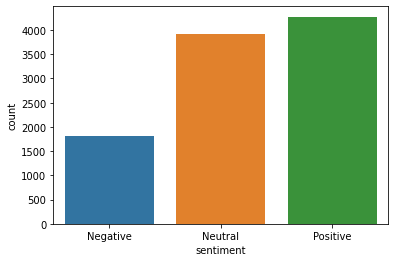

In [ ]:
sns.countplot(df.sentiment)

In [ ]:
df["clean_text"]=df["clean_text"].apply(nfx.remove_stopwords)

# sentiment anlysis using Vader

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
SIA = SentimentIntensityAnalyzer()